In [33]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as skm
df=pd.read_excel('512660.xls')
df.head()
#len(df)  out:1259
x0 = df['收盘价(元)'].values
x0=x0.reshape(len(x0),1)
#plt.plot(x0[:100])
x0.shape
#len(x0)
#取出x0中最大的数据 让所有的x0与这个最大的值做除法  得到的都是小于1的数据  便于训练神经网络
# m = max(x0)
# x0 = x0/m
# x0[:10]
# n = len(x0)
scaler = MinMaxScaler(feature_range=(0, 1)).fit(x0)
x0=pd.DataFrame(scaler.transform(x0))
#用20天的数据去预测下一天的数据
p = 20 
x = np.array([x0[k:k+p] for k in range(n-p+1)])
#1240笔数据 每个数据都包含20个数据
x.shape
y = np.array(x0[p:])
y.shape
X = x[:-1]
X.shape
X = X[:, :, np.newaxis]
X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train.shape


(1265, 20, 1, 1)

In [34]:
#模型搭建
model = Sequential()
model.add(Conv1D(50,4,padding='same',activation='relu',input_shape=(p,1)))#50个filter卷积核 大小4
model.add(MaxPooling1D(2))#每两个取一个大的   数据会减少一半
model.add(Flatten())#把二维数据变成一维的
 
model.add(Dense(20))#20个神经元的全连接层
model.add(Dropout(0.2))#防止过拟合 20%权重冻结
model.add(Activation('relu'))
model.add(Dense(1))#输出层 是一个一维的全连接神经网络
model.add(Activation('sigmoid'))
 
#model.compile(loss='mse',optimizer=SGD(lr=0.2), metrics['accuracy'])
model.compile(loss='mse', optimizer=SGD(lr=0.2))
model.summary()
#模型训练
model.fit(X_train,y_train,epochs=50,batch_size=32)

#数据可视化
y_predict = model.predict(X_test)
  #模型学到的

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 20, 50)            250       
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 10, 50)           0         
 1D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 500)               0         
                                                                 
 dense_14 (Dense)            (None, 20)                10020     
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 activation_14 (Activation)  (None, 20)                0         
                                                      

/Users/hatakeihei/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


40/40 [==============================] - 0s 1ms/step - loss: 0.0498
Epoch 2/50
40/40 [==============================] - 0s 1ms/step - loss: 0.0239
Epoch 3/50
40/40 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 4/50
40/40 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 5/50
40/40 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 7/50
40/40 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 8/50
40/40 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 9/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 10/50
40/40 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 11/50
40/40 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 12/50
40/40 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 13/50
40/40 [==============================] - 0s 1ms/

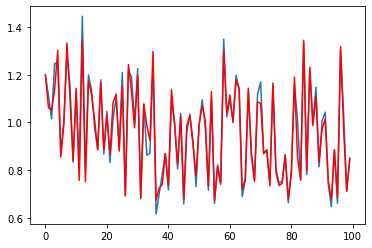

In [35]:
y_predict=scaler.inverse_transform(y_predict)
y_test=scaler.inverse_transform(y_test)
#plt.plot(y_test)
#plt.plot(y_predict,'r') 
plt.plot(y_test[:100])#取前一百个数据绘图  真实数据
plt.plot(y_predict[:100],'r')  

In [37]:
import sklearn.metrics as skm
MAPE = skm.mean_absolute_percentage_error(y_test, y_predict)
MSE = skm.mean_squared_error(y_test, y_predict)
RMSE = skm.mean_squared_error(y_test,y_predict,squared=False)
print("MAPE:"+str(round(MAPE,4)*100)+"%")
print("RMSE"+str(round(RMSE,4)))
print("MSE"+str(round(MSE,4)))

MAPE:2.59%
RMSE0.0359
MSE0.0013


In [38]:
len(y_test)

317